In [5]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\ana\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

df_heart = pd.read_csv("df_heart_modified.csv")
df_heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Cardiac_Risk_Index,BMI_Category,Healthy_Lifestyle,Mean_Blood_Pressure,Age_Group
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,South America,Southern Hemisphere,0,158,88,199.850247,Obesidade,0,123.0,Idoso
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,North America,Northern Hemisphere,0,165,93,257.338995,Sobrepeso,0,129.0,Jovem
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,Europe,Northern Hemisphere,0,174,99,338.635314,Sobrepeso,0,136.5,Jovem
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,North America,Northern Hemisphere,0,163,100,300.192941,Obesidade,0,131.5,Idoso
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,Asia,Northern Hemisphere,0,91,88,218.761829,Normal,0,89.5,Idoso


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Definindo as features e o target
features = ['BMI', 'Cholesterol', 'Triglycerides', 'Systolic', 'Diastolic', 'Exercise Hours Per Week', 'Sleep Hours Per Day']
X = df_heart[features]
y = df_heart['Healthy_Lifestyle']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Treinando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões nos dados de treino e teste
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
# Calculando a acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

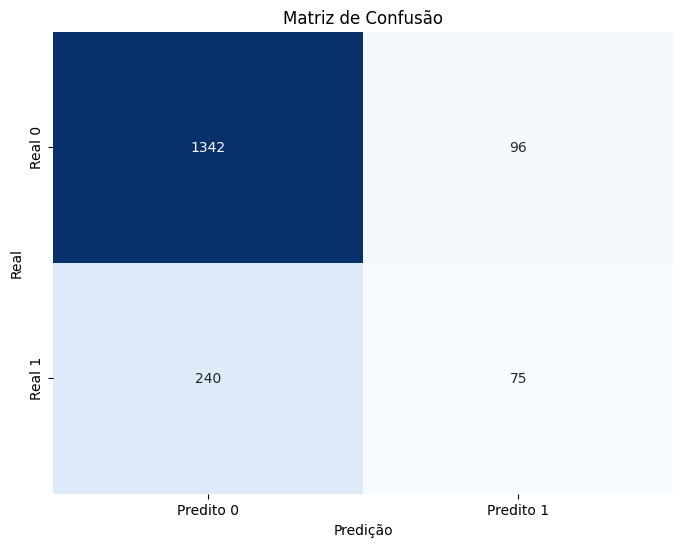

In [12]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotando o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Predito 0', 'Predito 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

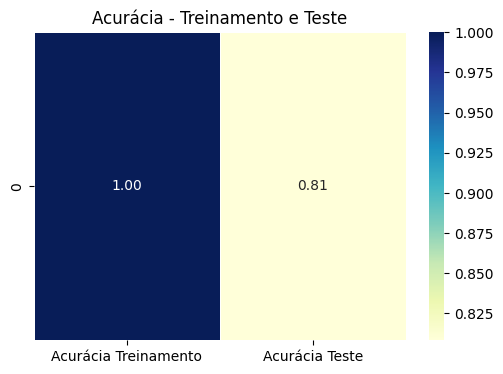

Acurácia no Conjunto de Treinamento: 1.00
Acurácia no Conjunto de Teste: 0.81


In [13]:
# Visualizando a acurácia no treino e teste em forma de heatmap
accuracy_matrix = pd.DataFrame([[train_accuracy, test_accuracy]], columns=['Acurácia Treinamento', 'Acurácia Teste'])

plt.figure(figsize=(6, 4))
sns.heatmap(accuracy_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Acurácia - Treinamento e Teste')
plt.show()

# Exibindo a acurácia de treino e teste
print(f'Acurácia no Conjunto de Treinamento: {train_accuracy:.2f}')
print(f'Acurácia no Conjunto de Teste: {test_accuracy:.2f}')
